In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(".\dataset\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


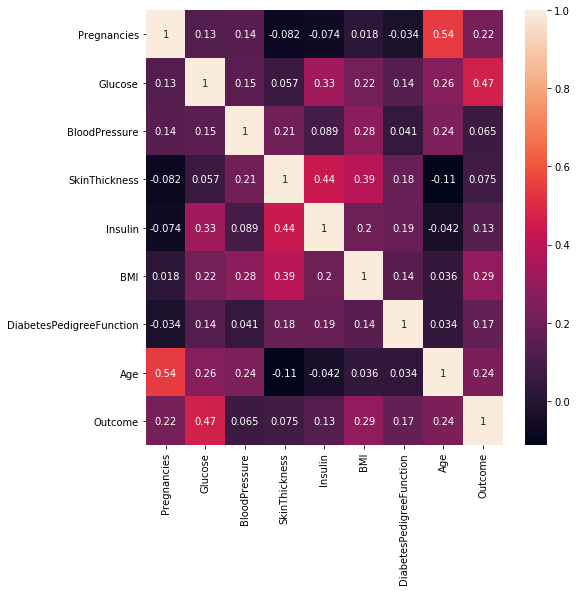

In [5]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [6]:
X=df.drop(["Outcome"],axis=1)
Y=df["Outcome"]

In [7]:
from sklearn import preprocessing
standardScaler=preprocessing.StandardScaler()# tries to scale mean near to 0 and std deviation near to 1
ScaledFeature=standardScaler.fit_transform(X)

In [8]:
ScaledDf=pd.DataFrame(ScaledFeature,columns=X.columns)
ScaledDf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [11]:
FinalDf=pd.concat([ScaledDf,Y],axis=1)
FinalDf.to_csv(".\dataset\ScaledDiabetes.csv",sep="\t")
FinalDf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [12]:
from sklearn.model_selection import train_test_split
X=df.drop(["Outcome"],axis=1)
Y=df["Outcome"]

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3)

In [32]:
from  sklearn.linear_model import LogisticRegression as LR

In [36]:
model=LR(penalty='l2',C=1.0,solver="liblinear")
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
ypred=model.predict(xtest)

In [39]:
pd.DataFrame({"Y Actual":ytest,"Y Predicted":ypred})

,Y Actual,Y Predicted
667,1,0
304,0,0
209,1,1
102,0,0
443,1,0
...,...,...
451,1,0
409,1,1
580,1,0
532,0,0


In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score 

In [42]:
"Accuracy:",accuracy_score(ytest,ypred),"Precision:",precision_score(ytest,ypred),"Recall:",recall_score(ytest,ypred)

('Accuracy:',
 0.8095238095238095,
 'Precision:',
 0.8518518518518519,
 'Recall:',
 0.5609756097560976)

In [43]:
from sklearn.tree import DecisionTreeClassifier as Dtree

In [44]:
model=Dtree(max_depth=4).fit(xtrain,ytrain)

In [46]:
ypred=model.predict(xtest)

In [49]:
"Accuracy:",accuracy_score(ytest,ypred),"Precision:",precision_score(ytest,ypred),"Recall:",recall_score(ytest,ypred)

('Accuracy:',
 0.7229437229437229,
 'Precision:',
 0.8461538461538461,
 'Recall:',
 0.2682926829268293)

In [51]:
ConfusionMatrix=pd.crosstab(ypred,ytest)
ConfusionMatrix

Outcome,0,1
row_0,,
0,145,60
1,4,22


In [53]:
TP=ConfusionMatrix[1][1]
TN=ConfusionMatrix[0][0]
FP=ConfusionMatrix[0][1]
FN=ConfusionMatrix[1][0]


In [55]:
"Accuracy:",(TP+TN)/(TP+TN+FP+FN)*100

('Accuracy:', 72.2943722943723)

In [58]:
"Precision:",TP/(TP+FP)

('Precision:', 0.8461538461538461)

In [59]:
"Recall:",TP/(TP+FN)

('Recall:', 0.2682926829268293)